In this challenge we'll be doing a linear fit with two input variables and one output, so our model looks like y ~ a + b*x_1 + c*x_2. First, let's import the libraries we'll need.

In [0]:
import numpy as np
import pandas as pd
import requests
import io
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

Now let's grab the data. This is a fictional data set made for the purpose of this exercise.

In [0]:
url="https://raw.githubusercontent.com/mathewphilipc/LambdaDataSets/master/bivariate_linear_data.csv"
s=requests.get(url).content
data=pd.read_csv(io.StringIO(s.decode('utf-8')))

We're going to find the optimal [a,b, c] values the right by, using the *normal equations*. The first step is to add a new column to the left of the x1 column and set all of its values to 1. Think of this as the x0 columns. Then introduce a matrix X consisting of the x0, x1, x2 columns and and vector Y with just the y column. Do any reshaping you need to make later steps work.

In [0]:
data['x0'] = np.ones(200)
X = data[['x0', 'x1', 'x2']].as_matrix()
Y = data['y'].as_matrix().reshape(-1, 1)

To make sure this worked, verify that X has length 200 and width 3.

In [4]:
X.shape

(200, 3)

And just for sanity' sake, print out the first row of X and compare it with the contents of the csv file we read from.

In [5]:
print(X[0])
data.iloc[0]

[  1.          11.42912648 -30.9129123 ]


x1     11.429126
x2    -30.912912
y     204.163058
x0      1.000000
Name: 0, dtype: float64

Now here's the most important part. As it turns out, the optimal vector [a, b, c] can be calculated in a single step (assuming you have a matrix algebra library and don't have to do the operations yourself) in terms of X and Y. Here's the solution:

$(X^T X)^{-1}  X^T Y$

Calculate [a, b, c] and print the values of a, b, and c.

In [0]:
left = np.linalg.inv(np.matmul(X.T, X))
right = np.matmul(X.T, Y)

M = np.matmul(left, right)

In [7]:
M

array([[-9.63746039],
       [13.04187886],
       [-2.00299621]])

Finally, plot the points defined by x,y and the plane that you calculated using the above matrix transforms.

In [0]:
x1, x2 = np.meshgrid(np.linspace(data['x1'].min(), data['x1'].max()),
                     np.linspace(data['x2'].min(), data['x2'].max()))

Z = x1*M[1] + x2*M[2] + M[0] 

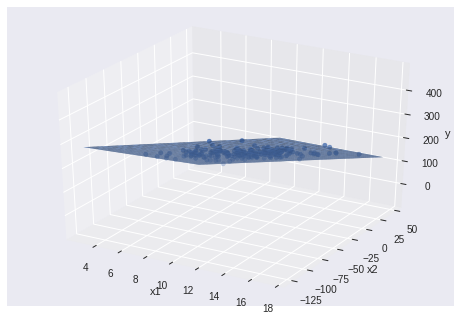

In [10]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(data['x1'], data['x2'], data['y'])
ax.plot_surface(x1, x2, Z)
ax.set(xlabel='x1', ylabel='x2', zlabel='y');